In [3]:
import os
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as hac
from collections import OrderedDict

In [4]:
def transform_ts(x, maxTT):

    minx = min(x)  
    x    = [xx - minx for xx in x] 
    maxx = max(x)
    x    = [xx * maxTT / maxx for xx in x]
    
    return x


def getBinnedDistribution(x, y, nbins):

    n, bins = np.histogram(x, bins=nbins)
    sy, _   = np.histogram(x, bins=nbins, weights=y)
    mean    = sy/n

    return _, mean

In [5]:
maturity   = 'senior_8_12'
method     = 'complete'
city       = 'london'
outfolder  = '../ProcessedData/' + city + '/timeseries/' + maturity  


In [6]:
city       = 'london'
infile     = '../ProcessedData/' + city + '/timeseries/senior_timeseries_8_12.dat'
venues_ts  = {}


for ind, line in enumerate(open(infile)):
    fields = line.strip().split('\t')
    venue  = fields[0]
    ts     = fields[1:]
    venues_ts[venue] = savgol_filter(np.asarray([float(fff) for fff in ts  ] ), 7, 3) 
print ind
len(venues_ts)

4460


4461

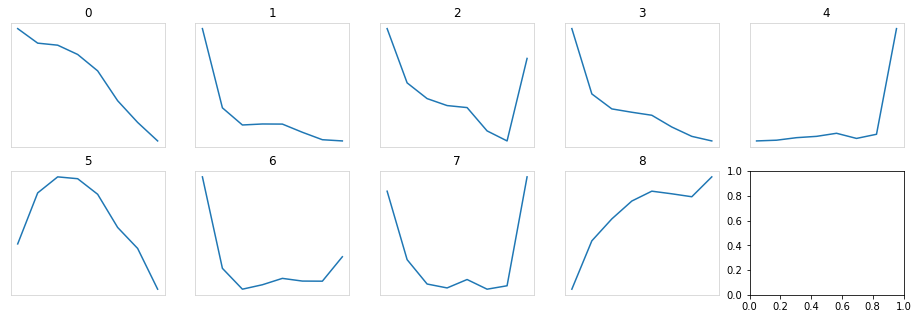

In [7]:
folder   = '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10'
files    = [folder + '/' + f for f in os.listdir(folder) if '4392' in f]
f, ax    = plt.subplots(2, 5, figsize=(16, 5)) 
indicies = [(i,j) for i in range(2) for j in range(5)]

ys = set()
curve      = []
curvefiles = {}

for ind, fn in enumerate(files):
    with open(fn) as myfile:
        x, y = myfile.read().strip().split('\n')
        x    = [float(xx) for xx in x.split('\t')]
        ys.add(y)
        curvefiles[y] = fn


curves, curvefiles2 = zip(*[(yyy, curvefiles[yyy]) for yyy in list(ys) ])
        
curves = [[float(yy) for yy in y.split('\t')]  for y in curves ]

 
   
for ind, c in enumerate(curves):
    ax[indicies[ind]].plot(x,c)
    
    ax[indicies[ind]].set_title(str(ind))
    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)
        




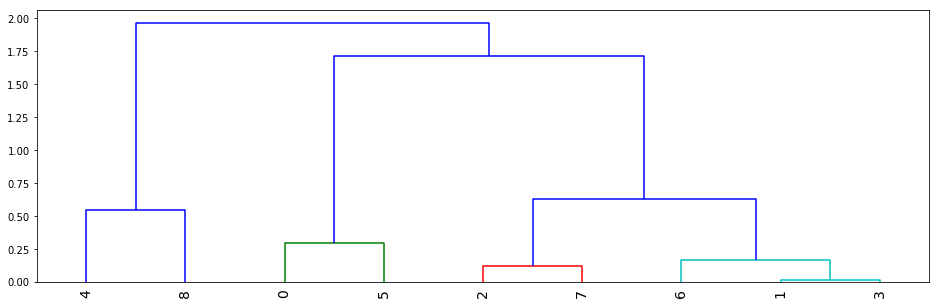

In [8]:
from dtw import dtw
from numpy.linalg import norm

'''for ind,c1 in enumerate(curves):
    for jind,c2 in enumerate(curves):
        if ind != jind:
            p1 = np.asarray(c1).reshape(-1, 1)
            p2 = np.asarray(c2).reshape(-1, 1)

            dist, cost, acc, path = dtw(p1,p2, dist=lambda p1, p2: norm(p1 - p2, ord=1))
            print ind, jind, dist 
'''
            
#p1 = np.asarray(curves[0]).reshape(-1, 1)
#p2 = np.asarray(curves[1]).reshape(-1, 1)
#dist, cost, acc, path = dtw(p1,p2, dist=lambda p1, p2: norm(p1 - p2, ord=1))

f, ax    = plt.subplots(1, 1, figsize=(16, 5)) 
  
    
def mydist(p1, p2):
    
    p1 = np.asarray(p1).reshape(-1, 1)
    p2 = np.asarray(p2).reshape(-1, 1)

    dist, cost, acc, path = dtw(p2, p1, dist=lambda p1, p2: norm(p1 - p2, ord=1))

    return dist


Z = hac.linkage(curves, method='complete', metric='correlation')
d = hac.dendrogram( Z, ax = ax,color_threshold = 0.4,  leaf_rotation=90.,  leaf_font_size=14., show_leaf_counts = True, no_labels = False)
    

9
7


['../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_5_4392_venuesnum=796.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_0_4392_venuesnum=150.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_8_4392_venuesnum=818.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_4392_venuesnum=763.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_6_4392_venuesnum=106.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_4392_venuesnum=872.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_6_4392_venuesnum=179.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_2_4392_venuesnum=133.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_3_4392_venuesnum=575.dat']

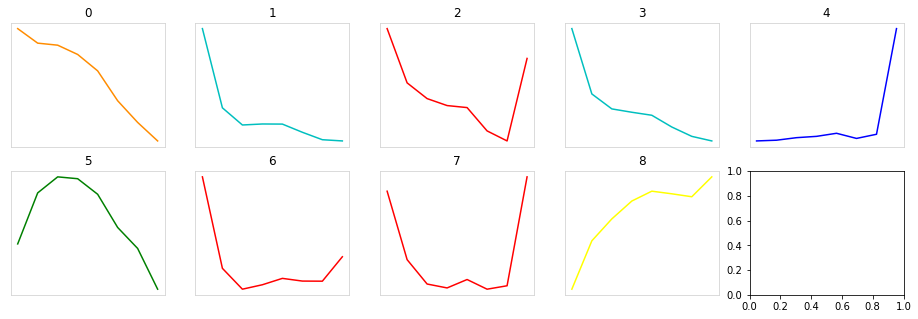

In [9]:
colors = {  4 : 'b',
            8 : 'yellow',
            0 : 'darkorange',
            5 : 'g',
            2 : 'r',
            7 : 'r',
            6 : 'r',
            1 : 'c',
            3 : 'c'
}


curves_files = {}


folder   = '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10'
files    = [folder + '/' + f for f in os.listdir(folder) if '4392' in f]
f, ax    = plt.subplots(2, 5, figsize=(16, 5)) 
indicies = [(i,j) for i in range(2) for j in range(5)]

ys = set()
curve= []

for ind, fn in enumerate(files):
    with open(fn) as myfile:
        x, y = myfile.read().strip().split('\n')
        x = [float(xx) for xx in x.split('\t')]
        
        curves_files[y] = fn
        
        ys.add(y)

        
curves = [[float(yy) for yy in y.split('\t')] for y in list(ys)]
 
for ind, c in enumerate(curves):
    ax[indicies[ind]].plot(x,c, color = colors[ind])
    
    ax[indicies[ind]].set_title(str(ind))
    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)
    
    
a=[f.split('avg_curve_')[1].split('_')[0] for f in curves_files.values()]
print len(a)
print len(set(a))

curves_files.values()

In [10]:
clusters_curves = {  0 : [0],
                     1 : [1, 3],
                     2 : [2, 6, 7],
                     3 : [4],
                     4 : [5],
                     5 : [8]        }


venue_curve_files = {   1 : 'venues_in_0_4392.dat',
                        3 : 'venues_in_5_4392.dat',  
                        4 : 'venues_in_6_4392.dat', 
                        5 : 'venues_in_7_4392.dat', 
                        0 : 'venues_in_3_4392.dat',
                        8 : 'venues_in_2_4392.dat', 
                        2 : 'venues_in_8_4392.dat', 
                        6 : 'venues_in_4_4392.dat', 
                        7 : 'venues_in_1_4392.dat'}

In [11]:
clusters_curves = {}
for curveid, color in colors.items():
    
    if color not in clusters_curves:
        clusters_curves[color] = [curveid]
    else:
        clusters_curves[color].append(curveid)
    
clusters_curves

{'b': [4],
 'c': [1, 3],
 'darkorange': [0],
 'g': [5],
 'r': [2, 6, 7],
 'yellow': [8]}

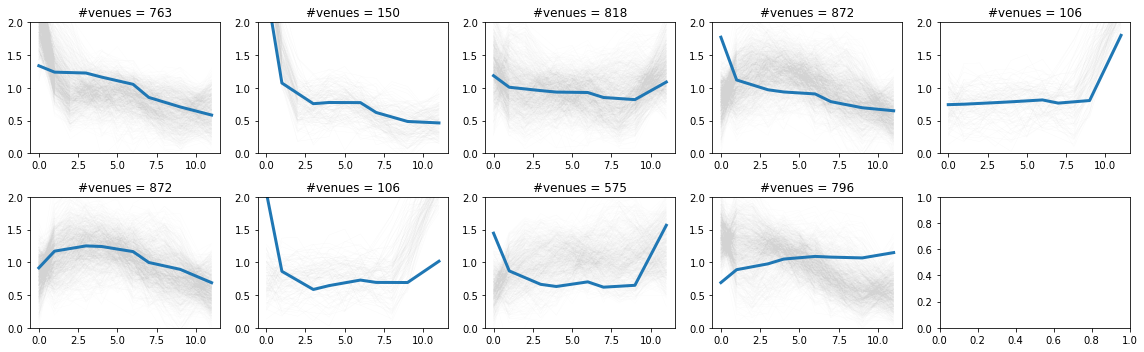

In [12]:
f, ax    = plt.subplots(2, 5, figsize=(16, 5)) 
indicies = [(i,j) for i in range(2) for j in range(5)]

for ind, curve in enumerate(curves):

    line    = curves_files['\t'.join([str(f) for f in curve])]
    curveid = line.strip().split('avg_curve_')[-1].split('_')[0]
    venues  = [line.strip() for line in open('../ProcessedData/london/timeseries/senior_8_12/clusters_venues/10/venues_in_' + curveid + '_4392.dat')]
    
    alpha_ = 0.15
    if len(venues) < 200:
        alpha_ = 0.3
    
    for v in venues:
        y = venues_ts[v]
        x = transform_ts(range(len(y)), 11)   
        
        ax[indicies[ind]].plot(x, y, linewidth = 0.15, color = 'lightgrey', alpha = alpha_)
    
    xx = transform_ts(range(len(curve)), 11) 
    ax[indicies[ind]].plot(xx, curve, linewidth = 3)
    ax[indicies[ind]].set_ylim([0,2])
    ax[indicies[ind]].set_title('#venues = ' + str(len(venues)))

plt.tight_layout()
    

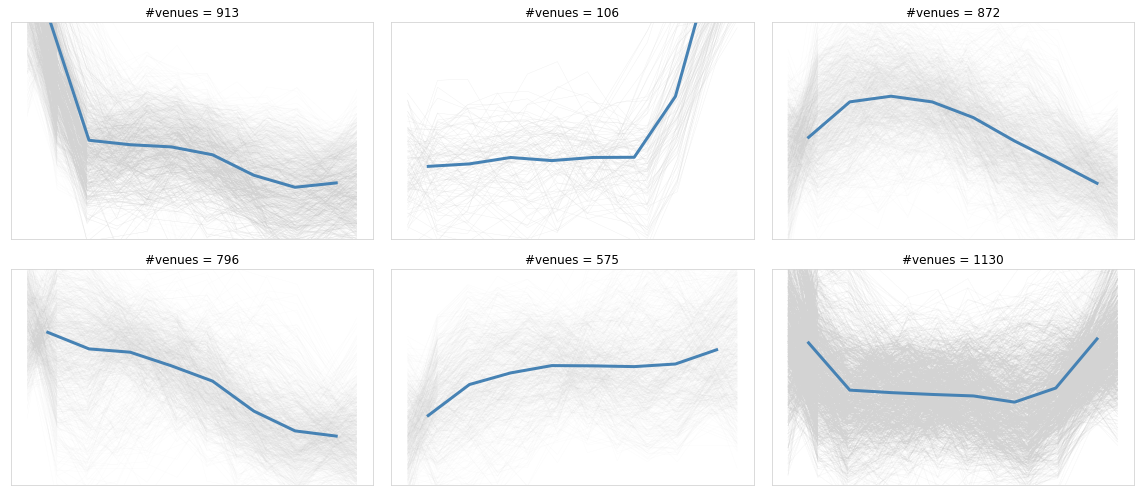

In [13]:
f, ax    = plt.subplots(2, 3, figsize=(16, 7)) 
indicies = [(i,j) for i in range(2) for j in range(3)]


clusters_venues = {}
average_curves  = {}

for ind, (cluster, curveids) in enumerate(clusters_curves.items()):
    
    venues = []
    ttt = []
    sss = []
    
    clusters_venues[cluster] = []

    for curveid in curveids:
        
        venues += [line.strip() for line in open('../ProcessedData/london/timeseries/senior_8_12/clusters_venues/10/' + venue_curve_files[curveid])]       
        #print cluster, curveid, ccccurveid,  len([line.strip() for line in open('../ProcessedData/london/timeseries/senior_8_12/clusters_venues/10/venues_in_' + ccccurveid + '_4392.dat')]       )

        alpha_ = 0.15
        if len(venues) > 1100:
            alpha_ = 0.04
        if len(venues) < 200:
            alpha_ = 0.55

            
        clusters_venues[cluster] += venues    
            
        for v in venues:
            y = venues_ts[v]
            x = transform_ts(range(len(y)), 11)   

            ttt += list(x)
            sss += list(y)

            ax[indicies[ind]].plot(x, y, linewidth = 0.25, color = 'lightgrey', alpha = alpha_)
        
        
        #print cluster, curveid, len(venues)
        #ax[indicies[ind]].plot(curves[curveid])
        
    bx, by = getBinnedDistribution(ttt, sss, 8  )
    bx     = (bx[1:] + bx[:-1])/2
    ax[indicies[ind]].set_title('#venues = ' + str(len(venues)), fontsize = 14)
    ax[indicies[ind]].plot(bx, by, linewidth = 3, color = 'steelblue')          

    average_curves[ind] = (bx, by)

    ax[indicies[ind]].set_title('#venues = ' + str(len(venues)))
    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)    
    ax[indicies[ind]].set_ylim([0.2,1.8])       
     
        
plt.tight_layout()

(0, 2)

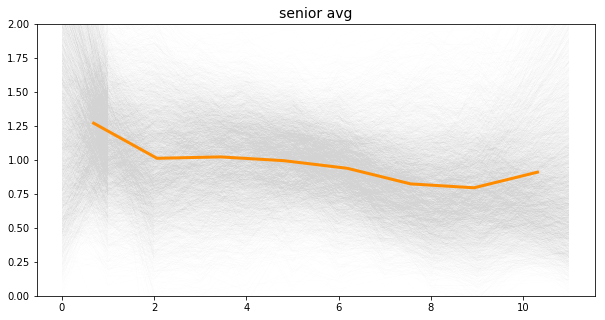

In [14]:
f, ax    = plt.subplots(1, 1, figsize=(10, 5)) 



ttt = []
sss = []

for v, ts in venues_ts.items():
    
    y = ts
    x = transform_ts(range(len(y)), 11)   

    ttt += list(x)
    sss += list(y)

    ax.plot(x, y, linewidth = 0.25, color = 'lightgrey', alpha = 0.01)


bx, by = getBinnedDistribution(ttt, sss, 8  )
bx     = (bx[1:] + bx[:-1])/2
ax.set_title('senior avg', fontsize = 14)
ax.plot(bx, by, linewidth = 3, color = 'darkorange')  


avg_avg = (bx, by)


ax.set_ylim([0,2])

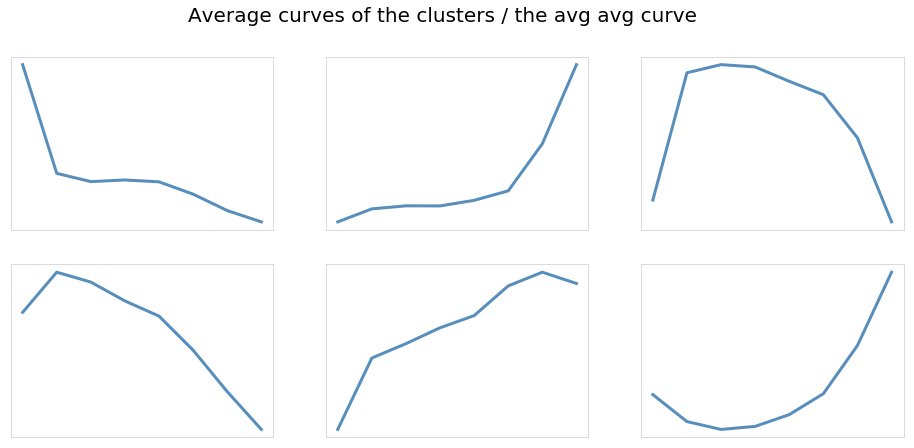

In [17]:
f, ax = plt.subplots(2, 3, figsize=(16, 7)) 

indicies = [(i,j) for i in range(2) for j in range(3)]


plt.suptitle('Average curves of the clusters / the avg avg curve', fontsize = 20)

for ind, (c, (bx, by)) in enumerate(average_curves.items()):
    
    by = [by[i] / avg_avg[1][i] for i in range(len(avg_avg[1]))]
    
    ax[indicies[ind]].plot(bx, by, linewidth = 3, alpha = 0.9, color = 'steelblue', label = 'cluster avg')
   # ax[indicies[ind]].plot(avg_avg[0], avg_avg[1], linewidth = 3, alpha = 0.9, color = 'darkorange', label ='avg avg')
    
    
    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)
    
    
    #ax[indicies[ind]].legend(loc = 'best')
    


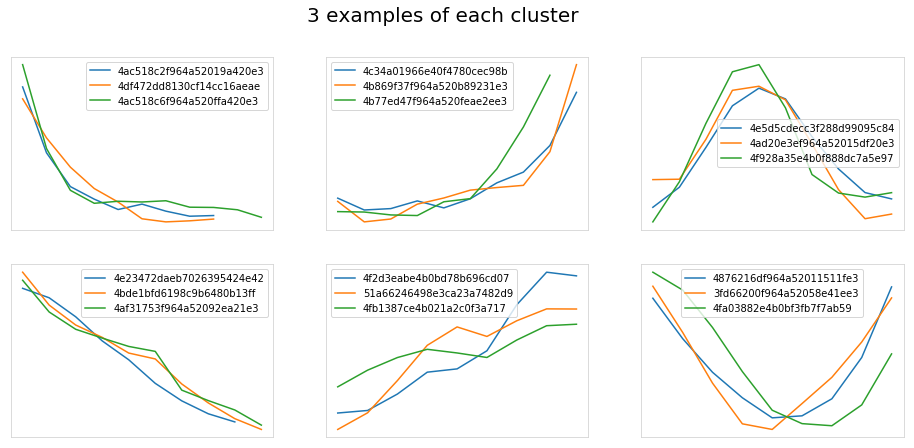

In [303]:
f, ax    = plt.subplots(2, 3, figsize=(16, 7)) 
indicies = [(i,j) for i in range(2) for j in range(3)]



examples0 = [['4ac518c2f964a52019a420e3', '4df472dd8130cf14cc16aeae', '4ee3529f7ee55891482c7836', '4ac518c6f964a520ffa420e3'],
            ['4c34a01966e40f4780cec98b', '4b869f37f964a520b89231e3', '4b77ed47f964a520feae2ee3', '4b686ea1f964a52040782be3'],
            ['4e5d5cdecc3f288d99095c84', '518a9dca498e801056906023', '4cc2e287306e224bb802936c', '4ad20e3ef964a52015df20e3', '5275296e11d25a0386333a37', '4f928a35e4b0f888dc7a5e97'],
            ['40b13b00f964a520aaf31ee3', '4ac518d0f964a52090a620e3', '4b4f6c7df964a520010627e3', '4e23472daeb7026395424e42', '4bde1bfd6198c9b6480b13ff', '4af31753f964a52092ea21e3'],
            ['4f45199fe4b0f766d4f43112', '4f2d3eabe4b0bd78b696cd07', '4ddf8ceb8877e0877e5bcba7', '4b43bb68f964a520e2e725e3','51a66246498e3ca23a7482d9','4c0fd1ff7c49b7133eb03606','4b269960f964a5201e7e24e3', '4fb1387ce4b021a2c0f3a717'],
            ['4876216df964a52011511fe3', '3fd66200f964a52058e41ee3', '44646408f964a52026331fe3', '4b23f5a1f964a520db5d24e3', '4ac518bef964a520eaa220e3','4fa03882e4b0bf3fb7f7ab59', '4bfc120cda7120a1a38549fd', '4d2e03a7f01f2c0f5d67992a' ]
           ]





examples = [['4ac518c2f964a52019a420e3', '4df472dd8130cf14cc16aeae', '4ac518c6f964a520ffa420e3'],
            ['4c34a01966e40f4780cec98b', '4b869f37f964a520b89231e3', '4b77ed47f964a520feae2ee3'],
            ['4e5d5cdecc3f288d99095c84', '4ad20e3ef964a52015df20e3', '4f928a35e4b0f888dc7a5e97'],
            ['4e23472daeb7026395424e42', '4bde1bfd6198c9b6480b13ff', '4af31753f964a52092ea21e3'],
            ['4f2d3eabe4b0bd78b696cd07', '51a66246498e3ca23a7482d9', '4fb1387ce4b021a2c0f3a717'],
            ['4876216df964a52011511fe3', '3fd66200f964a52058e41ee3', '4fa03882e4b0bf3fb7f7ab59']
           ]


 
plt.suptitle('3 examples of each cluster', fontsize = 20)
for ind, (c, venues) in enumerate(clusters_venues.items()):
        
    for v in examples[ind]:
        ax[indicies[ind]].plot(venues_ts[v], label = v)

    ax[indicies[ind]].legend(loc = 'best')
    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)


4ac518c2f964a52019a420e3
4b869f37f964a520b89231e3
4e5d5cdecc3f288d99095c84
4e23472daeb7026395424e42
4f2d3eabe4b0bd78b696cd07
4876216df964a52011511fe3


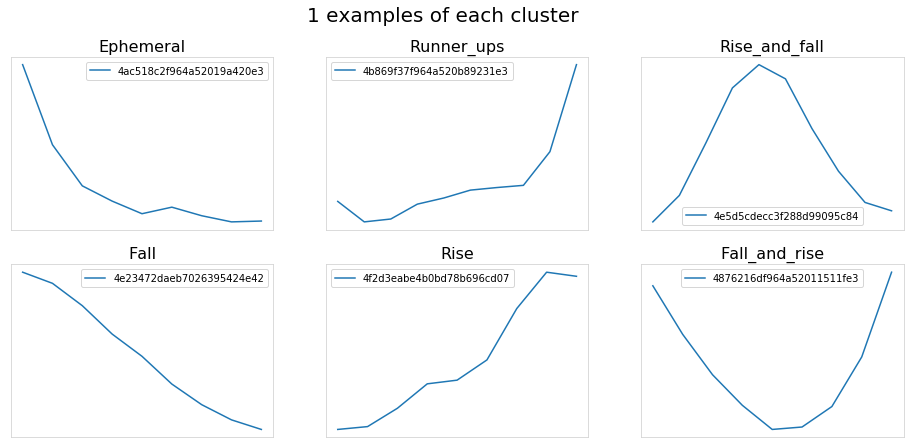

In [359]:
f, ax    = plt.subplots(2, 3, figsize=(16, 7)) 
indicies = [(i,j) for i in range(2) for j in range(3)]





examples = [['4ac518c2f964a52019a420e3'],
            ['4b869f37f964a520b89231e3'],
            ['4e5d5cdecc3f288d99095c84'],
            ['4e23472daeb7026395424e42'],
            ['4f2d3eabe4b0bd78b696cd07'],
            ['4876216df964a52011511fe3']]

       #     ['4f2d3eabe4b0bd78b696cd07', '51a66246498e3ca23a7482d9', '4fb1387ce4b021a2c0f3a717'],

clusters_names = {}
cnames         = ['Ephemeral', 'Runner_ups', 'Rise_and_fall',  'Fall', 'Rise', 'Fall_and_rise']
 
plt.suptitle('1 examples of each cluster', fontsize = 20)
for ind, (c, venues) in enumerate(clusters_venues.items()):
        
    for v in examples[ind]:
        ax[indicies[ind]].plot(venues_ts[v], label = v)

        print v
    ax[indicies[ind]].legend(loc = 'best')
    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)
    ax[indicies[ind]].set_title(cnames[ind], fontsize = 16)
    
    clusters_names[c] = cnames[ind]


# CATEGORIES PER CLUSTER

In [327]:
venues_cats    = {}
venues_subcats = {}

folder = '../ProcessedData/london/venues_info/venues_all_categories_times.dat'

for ind, line in enumerate(open(folder)):
    
    #if ind == 10: break
    
    fields = line.strip().split('\t')
    venue  = fields[1]
    cat    = fields[2]
    subcat = fields[3]
    
    if venue not in venues_cats:
        venues_cats[venue] = cat
    
    if venue not in venues_subcats:
        venues_subcats[venue] = subcat   
    
    
    
print len(venues_cats)

1346488


In [314]:
clusters_categories = {}
cats_total_cnt = {}

for ind, (c, venues) in enumerate(clusters_venues.items()):
    
    #if ind == 100: break
    
    if c not in clusters_categories:
        clusters_categories[c] = {}
    
    
    for v in venues:
        cat = venues_cats[v]
        if cat not in clusters_categories[c]:
            clusters_categories[c][cat]  = 1
        else:
            clusters_categories[c][cat] += 1
        
        
        if cat not in cats_total_cnt:
            cats_total_cnt[cat]  = 1
        else:
            cats_total_cnt[cat] += 1
    
all_cats = set(cats_total_cnt.keys())



for cluster, categories in clusters_categories.items():
    
    for c in list(all_cats.difference(set(categories.keys()))):
        clusters_categories[cluster][c] = 0
        
      #  if ccc not in cluster:
      #      clusters_categories[cluster][ccc] = 0
            
            
            
clusters_categories       

{'b': {'arts_entertainment': 11,
  'building': 4,
  'education': 1,
  'event': 0,
  'food': 34,
  'nightlife': 13,
  'parks_outdoors': 18,
  'shops': 6,
  'travel': 19},
 'c': {'arts_entertainment': 72,
  'building': 35,
  'education': 3,
  'event': 0,
  'food': 567,
  'nightlife': 250,
  'parks_outdoors': 40,
  'shops': 55,
  'travel': 41},
 'darkorange': {'arts_entertainment': 79,
  'building': 17,
  'education': 0,
  'event': 1,
  'food': 445,
  'nightlife': 159,
  'parks_outdoors': 32,
  'shops': 43,
  'travel': 20},
 'g': {'arts_entertainment': 133,
  'building': 15,
  'education': 1,
  'event': 0,
  'food': 399,
  'nightlife': 190,
  'parks_outdoors': 48,
  'shops': 63,
  'travel': 23},
 'r': {'arts_entertainment': 238,
  'building': 123,
  'education': 6,
  'event': 0,
  'food': 1359,
  'nightlife': 507,
  'parks_outdoors': 264,
  'shops': 266,
  'travel': 182},
 'yellow': {'arts_entertainment': 60,
  'building': 20,
  'education': 0,
  'event': 0,
  'food': 231,
  'nightlife': 

[Text(0,0,'building'),
 Text(0,0,'education'),
 Text(0,0,'food'),
 Text(0,0,'travel'),
 Text(0,0,'nightlife'),
 Text(0,0,'shops'),
 Text(0,0,'arts_entertainment'),
 Text(0,0,'event'),
 Text(0,0,'parks_outdoors')]

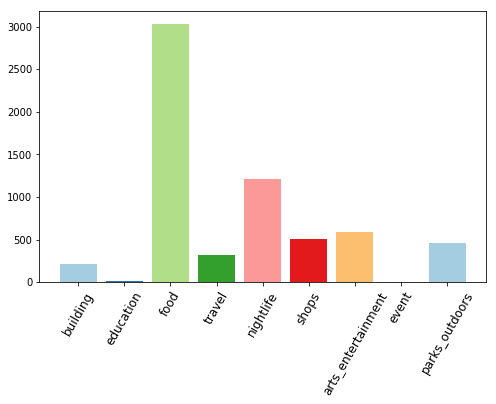

In [315]:
import colorbrewer 

colors = colorbrewer.Paired[8]
colors = [( c[0]/256.0, c[1]/256.0, c[2]/256.0)   for c in colors]



f, ax = plt.subplots(1, 1, figsize=(8, 5)) 

ax.bar(cats_total_cnt.keys(), cats_total_cnt.values(), color = colors)  
ax.set_xticklabels(cats_total_cnt.keys(), rotation = 60, fontsize = 12)


{'building': 35, 'food': 567, 'travel': 41, 'nightlife': 250, 'shops': 55, 'arts_entertainment': 72, 'parks_outdoors': 40}
{'building': 4, 'food': 34, 'travel': 19, 'nightlife': 13, 'shops': 6, 'parks_outdoors': 18, 'arts_entertainment': 11}
{'building': 15, 'food': 399, 'travel': 23, 'nightlife': 190, 'shops': 63, 'arts_entertainment': 133, 'parks_outdoors': 48}
{'building': 17, 'food': 445, 'travel': 20, 'nightlife': 159, 'shops': 43, 'arts_entertainment': 79, 'parks_outdoors': 32}
{'building': 20, 'food': 231, 'travel': 33, 'nightlife': 98, 'shops': 75, 'parks_outdoors': 58, 'arts_entertainment': 60}
{'building': 123, 'food': 1359, 'travel': 182, 'nightlife': 507, 'shops': 266, 'arts_entertainment': 238, 'parks_outdoors': 264}
{'building': 214, 'education': 11, 'food': 3035, 'travel': 318, 'nightlife': 1217, 'shops': 508, 'arts_entertainment': 593, 'event': 1, 'parks_outdoors': 460}


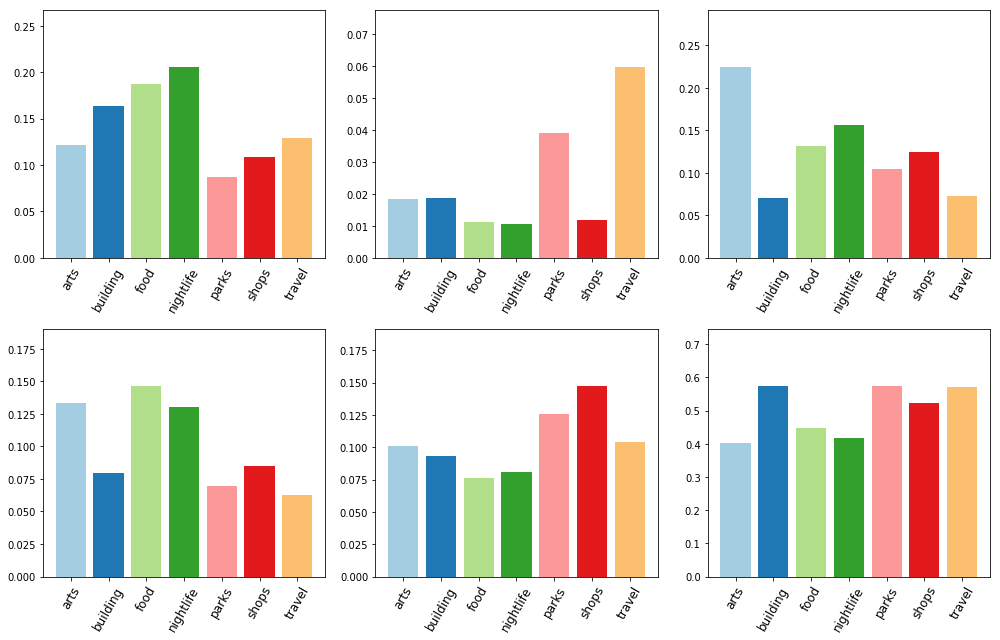

In [316]:
f, ax    = plt.subplots(2, 3, figsize=(14, 9)) 

indicies = [(i,j) for i in range(2) for j in range(3)]


for ind, (c, data) in enumerate(clusters_categories.items()):
    
    
    del data['event']
    del data['education']

        
    data2 = { }
    for k, v in data.items():
        data2[k] = float(v) / cats_total_cnt[k]
    
    
    data2 = list(data2.iteritems())
    data2.sort(key=lambda tup: tup[0])
    
    x, y = zip(*data2)
    
    print data
    
    
    
    
    ax_ind = indicies[ind]
    ax[ax_ind].bar(x,y, color = colors)
    

    ax[ax_ind].set_xticklabels([k.split('_')[0]  for k in  x] , rotation = 60, fontsize = 12)
    ax[ax_ind].set_ylim([0, 1.3*max(y)])
    
plt.tight_layout()


print cats_total_cnt

Get the weird categories from the Ephemeral category

b


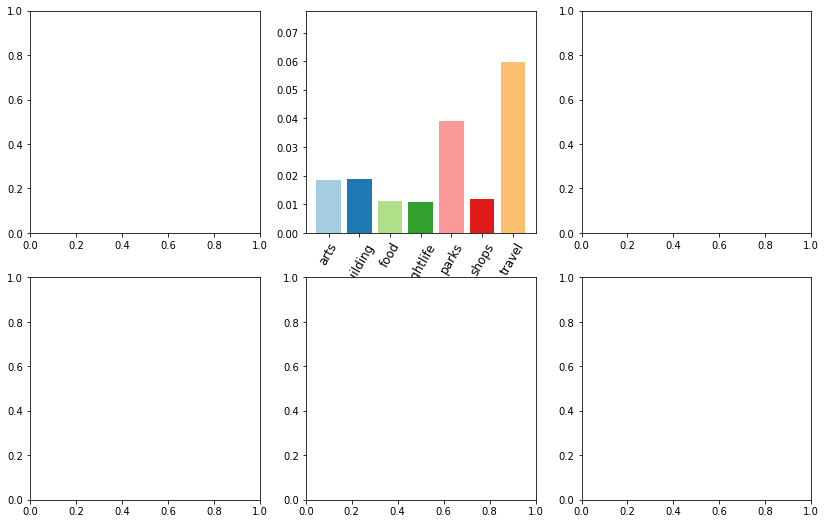

In [323]:
f, ax    = plt.subplots(2, 3, figsize=(14, 9)) 

indicies = [(i,j) for i in range(2) for j in range(3)]

for ind, (c, data) in enumerate(clusters_categories.items()):

    if ind == 1:
        
        print c
        
        data2 = { }
        for k, v in data.items():
            data2[k] = float(v) / cats_total_cnt[k]


        data2 = list(data2.iteritems())
        data2.sort(key=lambda tup: tup[0])

        x, y = zip(*data2)

        ax_ind = indicies[ind]
        ax[ax_ind].bar(x,y, color = colors)


        ax[ax_ind].set_xticklabels([k.split('_')[0]  for k in  x] , rotation = 60, fontsize = 12)
        ax[ax_ind].set_ylim([0, 1.3*max(y)])
        
        

In [332]:
len(clusters_venues['b'])

106

[Text(0,0,u'Airport'),
 Text(0,0,u'Pub'),
 Text(0,0,u'Hotel'),
 Text(0,0,u'Caf\xe9'),
 Text(0,0,u'Park'),
 Text(0,0,u'Bar'),
 Text(0,0,u'Bridge'),
 Text(0,0,u'Restaurant'),
 Text(0,0,u'Art Gallery'),
 Text(0,0,u'Seafood Restaurant'),
 Text(0,0,u'Neighborhood'),
 Text(0,0,u'Gastropub'),
 Text(0,0,u'French Restaurant'),
 Text(0,0,u'City'),
 Text(0,0,u'Burger Joint'),
 Text(0,0,u'Chinese Restaurant'),
 Text(0,0,u'Supermarket'),
 Text(0,0,u'Theater'),
 Text(0,0,u'History Museum')]

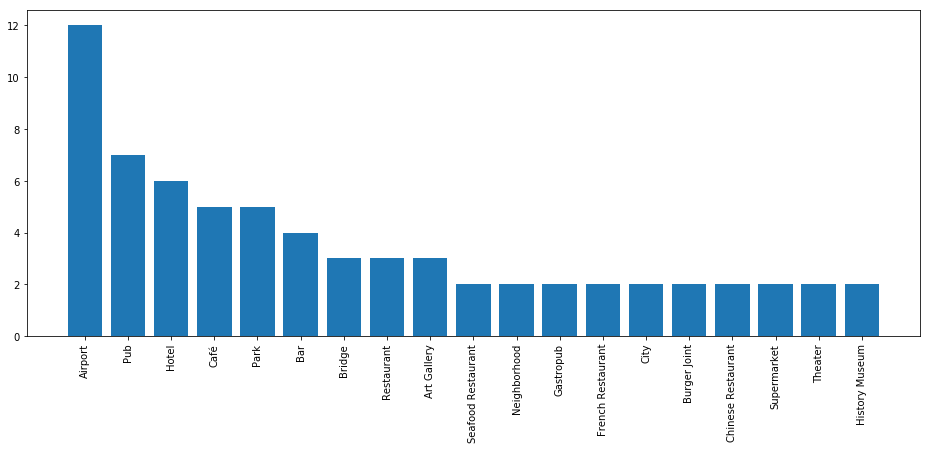

In [352]:
subcat_countr_emph = []

for ind, v in enumerate(clusters_venues['b']):   
    subcat_countr_emph.append(venues_subcats[v])
    
    
subcat_countr_emph_cnt = dict(Counter(subcat_countr_emph).most_common(19))
subcat_countr_emph_cnt  
data = [(k,v) for k, v in subcat_countr_emph_cnt.items()]
data.sort(key=lambda tup: tup[1], reverse = True)
x, y = zip(*data)

f, ax = plt.subplots(1, 1, figsize = (16,6))
ax.bar(x, y)
ax.set_xticklabels([xx.decode('utf-8') for xx in x], rotation = 90)

In [361]:
outfolder = '../ProcessedData/' + city + '/timeseries/senior_clusters_first_demo'

if not os.path.exists(outfolder):
    os.makedirs(outfolder)
    

for c, venues in clusters_venues.items():
    fout = open(outfolder + '/' + clusters_names[c] + '.dat', 'w')
    fout.write('\n'.join(venues))
    fout.close()